# Project Visualisations

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Setup CSV

In [2]:
df_FS = pd.read_csv('feasibility_strategys.csv')
df_LT = pd.read_csv('length_time.csv')
df_PT = pd.read_csv('paths_time.csv')
df_CR = pd.read_csv('corr.csv')
df_SELECTED = df_CR.iloc[:, 1:4]
df_PT.head()

,lengths,Running Time,Generated Paths,Pruned Paths,examples/benchmark/divByN.gcl runtime,examples/benchmark/divByN.gcl generated paths,examples/benchmark/divByN.gcl pruned paths,examples/benchmark/memberOf.gcl no heuristics runtime,examples/benchmark/memberOf.gcl no heuristics generated paths,examples/benchmark/memberOf.gcl no heuristics pruned paths,examples/benchmark/memberOf.gcl runtime,examples/benchmark/memberOf.gcl generated paths,examples/benchmark/memberOf.gcl pruned paths,examples/benchmark/pullUp.gcl no heuristics runtime,examples/benchmark/pullUp.gcl no heuristics generated paths,examples/benchmark/pullUp.gcl no heuristics pruned paths,examples/benchmark/pullUp.gcl runtime,examples/benchmark/pullUp.gcl generated paths,examples/benchmark/pullUp.gcl pruned paths
0,30,0.048841,97,0,0.059223,5,8,0.065855,127,0,0.120370,114,13,1.061415,126,0,0.132442,15,27
1,60,29.003096,56675,0,0.065932,35,53,20.945514,16383,0,23.874758,16370,13,60.000000,0,0,0.071176,8,14
2,90,60.000000,0,0,0.243678,176,123,60.000000,0,0,60.000000,0,0,60.000000,0,0,0.041721,8,16


## Final Visualisations

### DivByN

#### Path Length vs Run Time (Pruning variations)

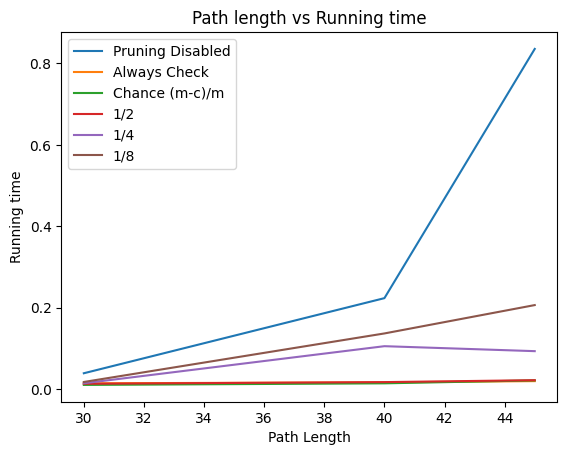

In [3]:
x = df_FS.iloc[:, 0]

for i in range(1, 7):
    if i == 1:
        plt.plot(x, df_FS.iloc[:, i], label=f'Pruning Disabled')
    elif i == 2:
        plt.plot(x, df_FS.iloc[:, i], label=f'Always Check')
    elif i == 3:
        plt.plot(x, df_FS.iloc[:, i], label=f'Chance (m-c)/m')
    elif i == 4:
        plt.plot(x, df_FS.iloc[:, i], label=f'1/2')
    elif i == 5:	
        plt.plot(x, df_FS.iloc[:, i], label=f'1/4')
    else:  
        plt.plot(x, df_FS.iloc[:, i], label=f'1/8')

plt.xlabel('Path Length')
plt.ylabel('Running time')
plt.title('Path length vs Running time')
plt.legend()
#plt.show()
plt.savefig("DivByN-lenght-time.pdf")

#### Run Time vs (No)Heuristic

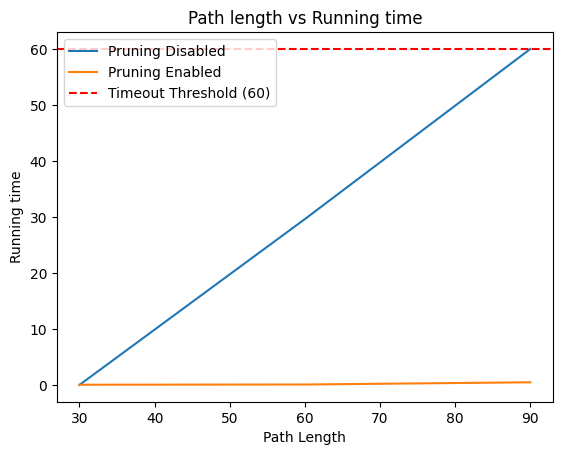

In [4]:
x = df_LT.iloc[:, 0]
timeout_threshold = 60

for i in range(1, 3):
    if i == 1:
        plt.plot(x, df_LT.iloc[:, i], label=f'Pruning Disabled')
    else:
        plt.plot(x, df_LT.iloc[:, i], label=f'Pruning Enabled')


plt.axhline(y=timeout_threshold, color='red', linestyle='--', label='Timeout Threshold (60)')
plt.xlabel('Path Length')
plt.ylabel('Running time')
plt.title('Path length vs Running time')
plt.legend()
#plt.show()
plt.savefig("DivByN-lenght-time-pruning.pdf")

#### Run Time vs Paths Generated

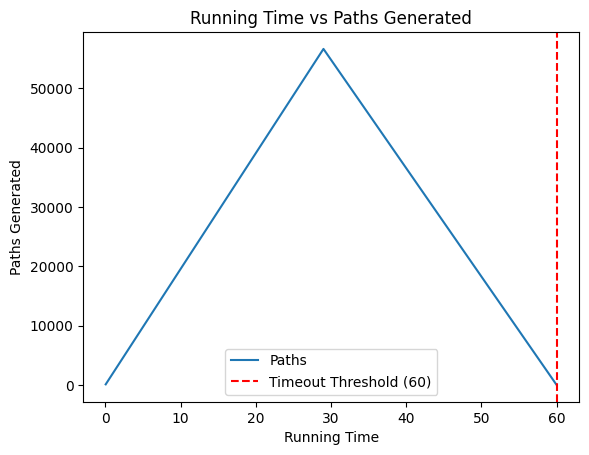

In [5]:
x = df_PT.iloc[:, 1]
timeout_threshold = 60

plt.plot(x, df_PT.iloc[:, 2], label=f'Paths')

plt.axvline(x=timeout_threshold, color='red', linestyle='--', label='Timeout Threshold (60)')
plt.xlabel('Running Time')
plt.ylabel('Paths Generated')
plt.title('Running Time vs Paths Generated')
plt.legend()
#plt.show()
plt.savefig("DivByN-paths-generated-time.pdf")

### MemberOf

#### Path Length vs Run Time (Pruning variations)

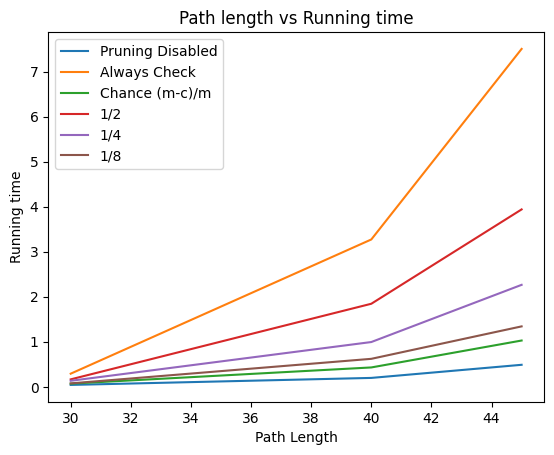

In [6]:
x = df_FS.iloc[:, 0]

for i in range(7, 13):
    if i == 7:
        plt.plot(x, df_FS.iloc[:, i], label=f'Pruning Disabled')
    elif i == 8:
        plt.plot(x, df_FS.iloc[:, i], label=f'Always Check')
    elif i == 9:
        plt.plot(x, df_FS.iloc[:, i], label=f'Chance (m-c)/m')
    elif i == 10:
        plt.plot(x, df_FS.iloc[:, i], label=f'1/2')
    elif i == 11:
        plt.plot(x, df_FS.iloc[:, i], label=f'1/4')
    else: 
        plt.plot(x, df_FS.iloc[:, i], label=f'1/8')

plt.xlabel('Path Length')
plt.ylabel('Running time')
plt.title('Path length vs Running time')
plt.legend()
#plt.show()
plt.savefig("MemberOf-length-time.pdf")

#### Run Time vs (No)Heuristic

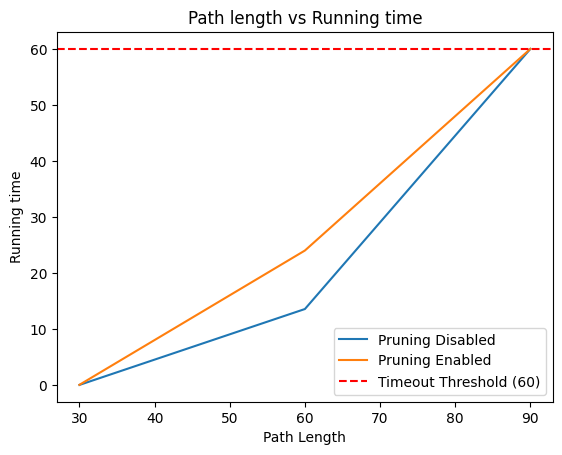

In [7]:
x = df_LT.iloc[:, 0]
timeout_threshold = 60

for i in range(3, 5):
    if i == 3:
        plt.plot(x, df_LT.iloc[:, i], label=f'Pruning Disabled')
    else:
        plt.plot(x, df_LT.iloc[:, i], label=f'Pruning Enabled')

plt.axhline(y=timeout_threshold, color='red', linestyle='--', label='Timeout Threshold (60)')
plt.xlabel('Path Length')
plt.ylabel('Running time')
plt.title('Path length vs Running time')
plt.legend()
#plt.show()
plt.savefig("MemberOf-length-time-pruning.pdf")

#### Run Time vs Paths Generated

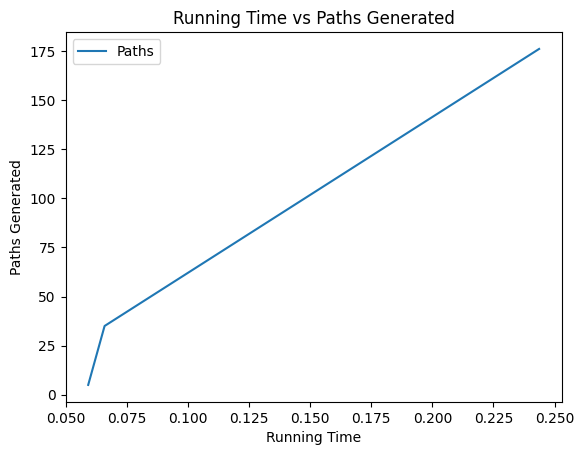

In [8]:
x = df_PT.iloc[:, 4]

plt.plot(x, df_PT.iloc[:, 5], label=f'Paths')

plt.xlabel('Running Time')
plt.ylabel('Paths Generated')
plt.title('Running Time vs Paths Generated')
plt.legend()
#plt.show()
plt.savefig("MemberOf-running-time-paths-generated.pdf")

### PullUp

#### Path Length vs Run Time (Pruning variations)

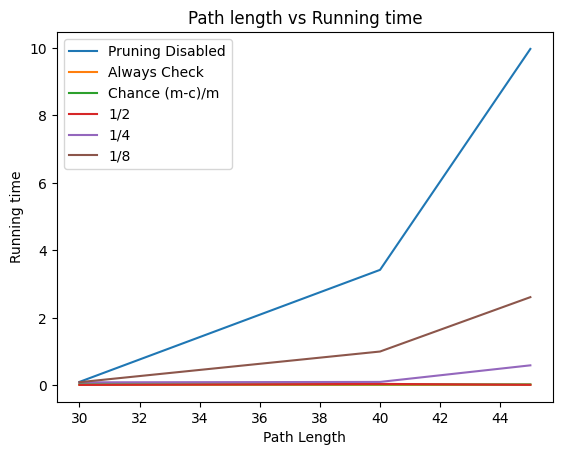

In [9]:
x = df_FS.iloc[:, 0]

for i in range(13, 19):
    if i == 13:
        plt.plot(x, df_FS.iloc[:, i], label=f'Pruning Disabled')
    elif i == 14:
        plt.plot(x, df_FS.iloc[:, i], label=f'Always Check')
    elif i == 15:
        plt.plot(x, df_FS.iloc[:, i], label=f'Chance (m-c)/m')
    elif i == 16:
        plt.plot(x, df_FS.iloc[:, i], label=f'1/2')
    elif i == 17:
        plt.plot(x, df_FS.iloc[:, i], label=f'1/4')
    else: 
        plt.plot(x, df_FS.iloc[:, i], label=f'1/8')

plt.xlabel('Path Length')
plt.ylabel('Running time')
plt.title('Path length vs Running time')
plt.legend()
#plt.show()
plt.savefig("PullUp-lenght-time.pdf")

#### Run Time vs (No)Heuristic

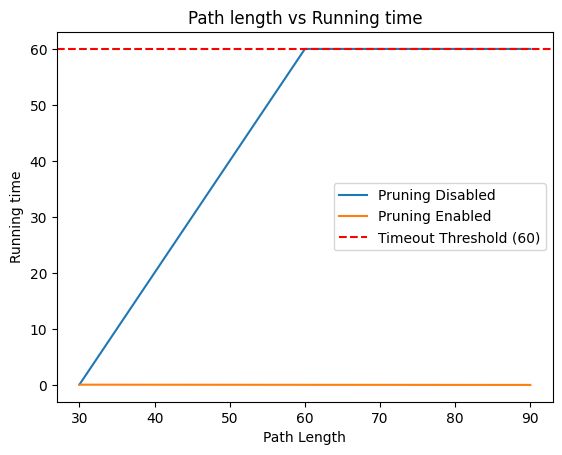

In [10]:
x = df_LT.iloc[:, 0]
timeout_threshold = 60

for i in range(5, 7):
    if i == 5:
        plt.plot(x, df_LT.iloc[:, i], label=f'Pruning Disabled')
    else:
        plt.plot(x, df_LT.iloc[:, i], label=f'Pruning Enabled')


plt.axhline(y=timeout_threshold, color='red', linestyle='--', label='Timeout Threshold (60)')
plt.xlabel('Path Length')
plt.ylabel('Running time')
plt.title('Path length vs Running time')
plt.legend()
#plt.show()
plt.savefig("PullUp-lenght-time-pruning.pdf")

#### Run Time vs Paths Generated

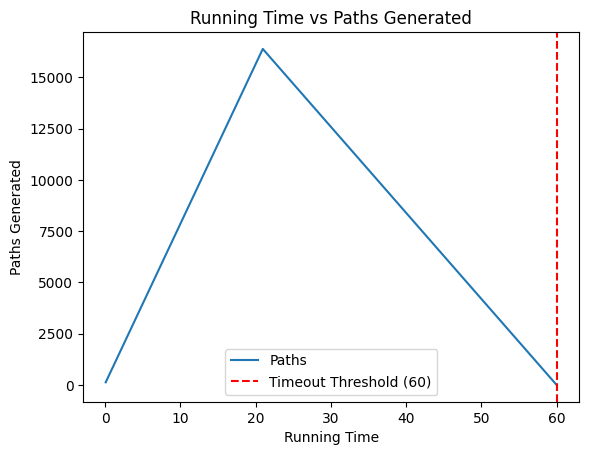

In [11]:
x = df_PT.iloc[:, 7]
timeout_threshold = 60

plt.plot(x, df_PT.iloc[:, 8], label=f'Paths')

plt.axvline(x=timeout_threshold, color='red', linestyle='--', label='Timeout Threshold (60)')
plt.xlabel('Running Time')
plt.ylabel('Paths Generated')
plt.title('Running Time vs Paths Generated')
plt.legend()
#plt.show()
plt.savefig("PullUp-time-paths-generated.pdf")

### Corellation Matrix

                 Running Time  Generated Paths  Pruned Paths
Running Time         1.000000         0.382971     -0.292584
Generated Paths      0.382971         1.000000     -0.647370
Pruned Paths        -0.292584        -0.647370      1.000000


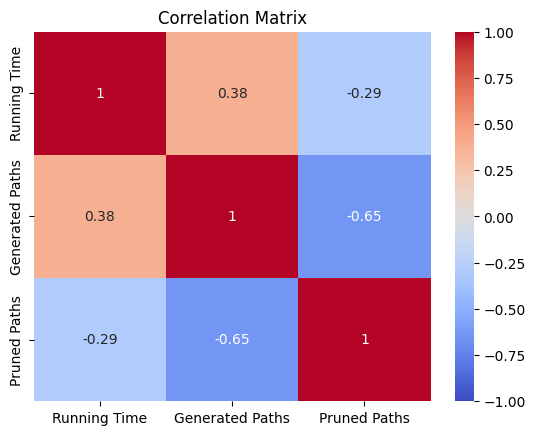

In [12]:
correlation_matrix = df_SELECTED.corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
#plt.show()
plt.savefig("Correlation_matrix-time-paths-pruned.pdf")

                   Running Time.1  Generated Paths.1  Pruned Paths.1
Running Time.1           1.000000           0.156016       -0.646321
Generated Paths.1        0.156016           1.000000       -0.433666
Pruned Paths.1          -0.646321          -0.433666        1.000000


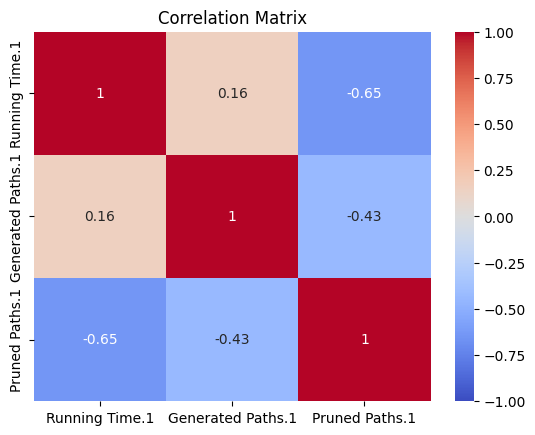

In [13]:
df_SELECTED2 = df_CR.iloc[:, 4:7]
correlation_matrix = df_SELECTED2.corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
#plt.show()
plt.savefig("Correlation_matrix-time-paths-pruned-1.pdf")

                   Running Time.2  Generated Paths.2  Pruned Paths.2
Running Time.2           1.000000          -0.665055       -0.726195
Generated Paths.2       -0.665055           1.000000        0.996372
Pruned Paths.2          -0.726195           0.996372        1.000000


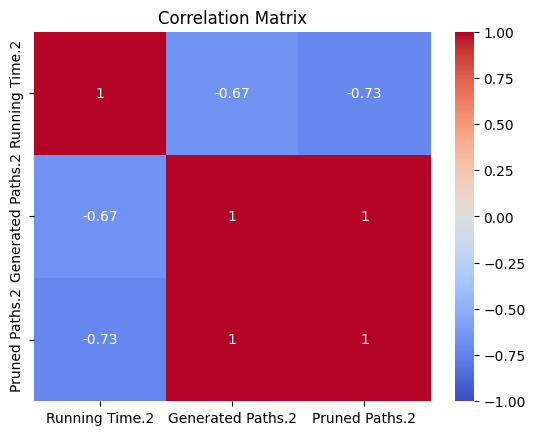

In [14]:
df_SELECTED3 = df_CR.iloc[:, 7:10]
correlation_matrix = df_SELECTED3.corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
#plt.show()
plt.savefig("Correlation_matrix-time-paths-pruned-2.pdf")